In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
## import some basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
## Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [10]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [12]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [15]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'],axis=1)

In [16]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [18]:
X=pd.concat([X,geography,gender],axis=1)

In [20]:
# splitting the dataset into Trainig set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [23]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [24]:
X_train.shape

(8000, 11)

In [26]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [27]:
## Lets initialize the ANN
classifier=Sequential()

In [28]:
## Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [50]:
## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [51]:
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [52]:
## adding the output layer
classifier.add(Dense(1,activation='sigmoid'))
classifier.add(Dropout(0.2))

In [33]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
import tensorflow
tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [54]:
## Early Stopping
import tensorflow as tf

Early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [55]:
model_history = classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=Early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3132 - accuracy: 0.8655 - val_loss: 0.3646 - val_accuracy: 0.8497
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3127 - accuracy: 0.8683 - val_loss: 0.3673 - val_accuracy: 0.8516
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3132 - accuracy: 0.8698 - val_loss: 0.3664 - val_accuracy: 0.8497
Epoch 4/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3127 - accuracy: 0.8677 - val_loss: 0.3634 - val_accuracy: 0.8519
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3133 - accuracy: 0.8688 - val_loss: 0.3656 - val_accuracy: 0.8516
Epoch 6/1000
536/536 [==============================] - 1s 3ms/step - loss: 0.3123 - accuracy: 0.8699 - val_loss: 0.3642 - val_accuracy: 0.8550
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3134 - accuracy: 0.8712 - val_loss: 0.3648 - val_accuracy:

In [56]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

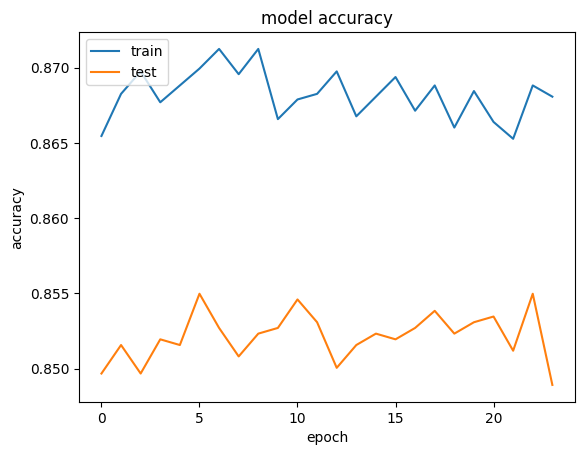

In [57]:
# summarize histroy for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


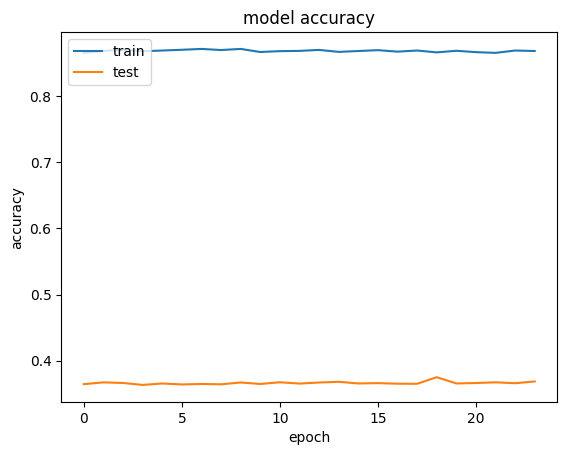

In [58]:
# summarize histroy for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [59]:
## making the predictions and evaluatiing the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 1ms/step


In [60]:
## making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,y_pred)
cm

array([[1528,   67],
       [ 216,  189]])

In [61]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,Y_test)

In [62]:
score

0.8585

In [63]:
# get the weights
classifier.get_weights()

[array([[ 0.06803942, -0.7236696 ,  0.2350838 , -0.3326866 ,  0.29845622,
         -0.03029279, -0.23849429,  0.81632876, -0.20326103, -0.37863064,
          0.5540761 ],
        [-0.9032406 , -0.07789469, -0.7417483 ,  0.24093078,  0.60559034,
          0.6022256 ,  0.65071505, -0.586381  ,  0.87799865,  0.4312196 ,
          0.3799264 ],
        [ 0.18490295, -0.12501583,  0.05552773,  0.09307012, -0.11168349,
          0.11345459,  0.15452302, -0.295045  , -0.05620658,  0.32875717,
          0.16460735],
        [ 0.138148  ,  0.86850774,  0.2784734 , -0.7980991 , -0.39639565,
         -0.29873806, -0.35707775,  0.15916803,  0.26994142, -0.16205467,
          0.2616833 ],
        [-0.02337367, -0.4867355 ,  0.06700112,  0.5547079 , -0.76286423,
          1.2718499 , -0.29166707,  0.48733073,  1.3335055 ,  0.6335617 ,
         -0.46678028],
        [ 0.21160431, -0.19985893, -0.18402082,  0.02401728,  0.5605221 ,
          0.3027237 , -0.09174243,  0.49485895,  0.07804883, -0.0488809